# Performance metrics of Buy & Hold Strategy

The purpose of this notebook is to calculate performance metrics over the benchmark and compare it with results obtained in other papers. I will compare my results with two papers:  
- Hybrid Investment Strategy Based on Momentum and Macroeconomic Approach - Kamil Korzeń, Robert Ślepaczuk  
- Predicting prices of S&P500 index using classical methods and recurrent neural networks - Mateusz Kijewski, Robert Ślepaczuk

In [1]:
# Settings for notebook visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;text-align: center;vertical-align: middle;} </style>""")

In [2]:
# Necessary imports
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import quantstats as qs
print("Libraries imported correctly")

Libraries imported correctly


In [3]:
os.chdir("/Users/Sergio/Documents/Master_QF/Thesis/Code/Algorithmic Strategies")
%run Functions.ipynb

# Load data

,Close,Market_daily_ret
Date,,
1990-01-02,359.690002,0.017799
1990-01-03,358.760010,-0.002586
1990-01-04,355.670013,-0.008613
1990-01-05,352.200012,-0.009756
1990-01-08,353.790009,0.004514


<AxesSubplot:title={'center':'SP500'}, xlabel='Date'>

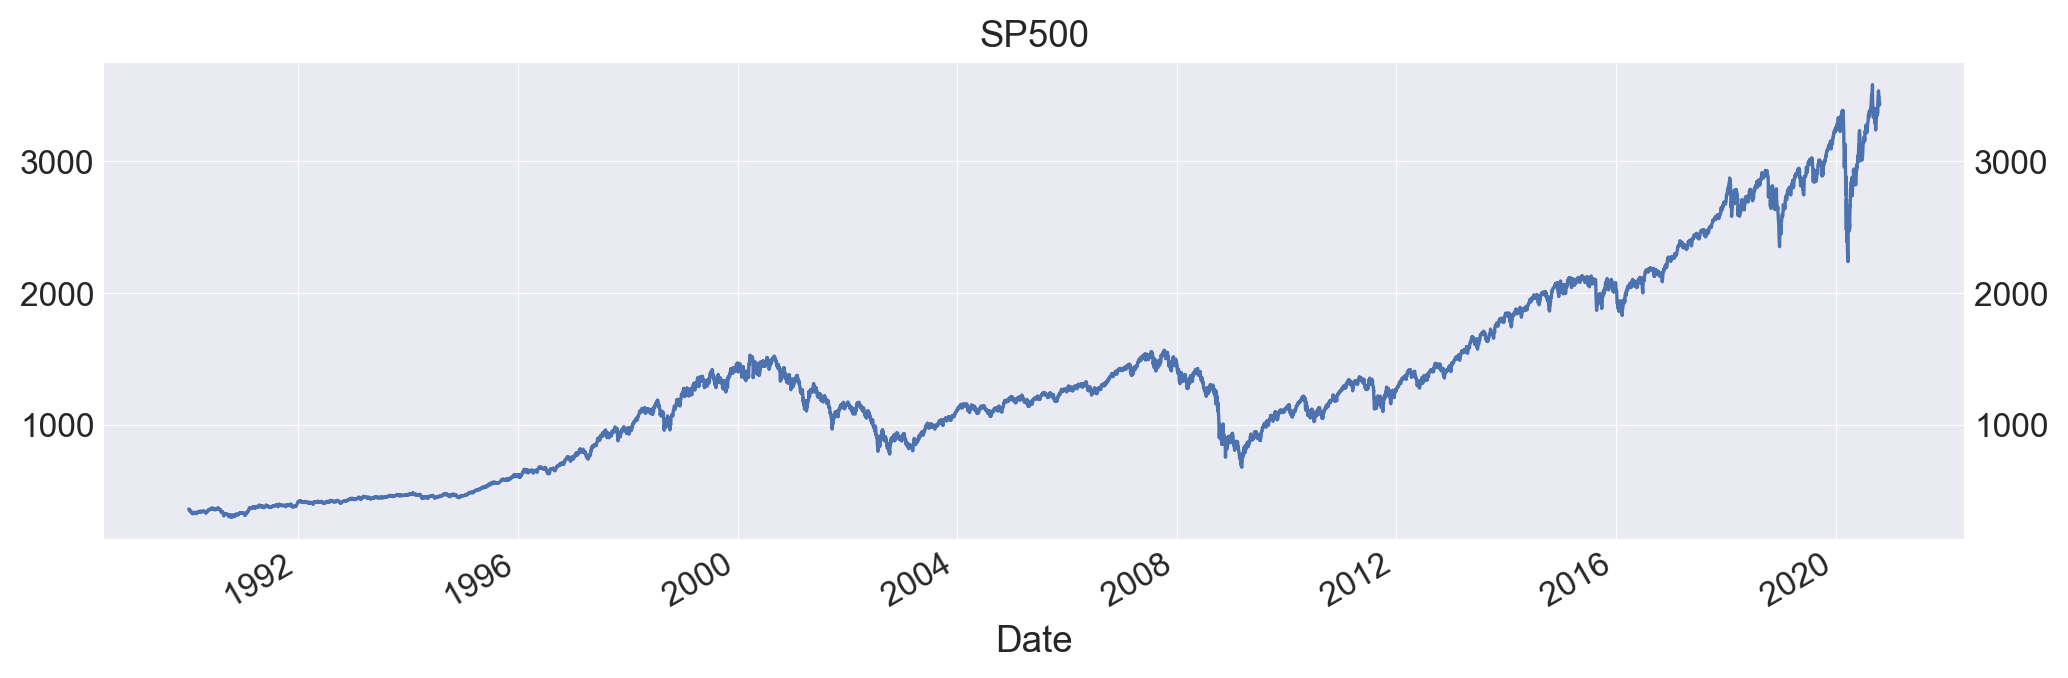

In [6]:
%run Functions.ipynb
df = get_sp500_data(from_local_file=True, save_to_file=False)
df['Market_daily_ret'] = df['Close'].pct_change()

df = df.loc['1990':'2020', ['Close', 'Market_daily_ret']]

df.head()
df['Close'].plot(title='SP500')

# Paper from Kamil: Hybrid Investment Strategy Based on Momentum and Macroeconomic Approach

Data from 1991-01-03 to 2018-01-03  
Uses daily returns to calculate the metrics

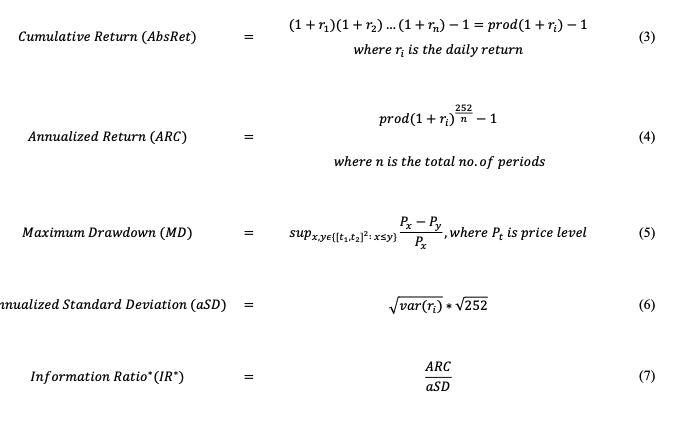

In [5]:
from IPython.display import Image
Image(filename='/Users/Sergio/Documents/Master_QF/Thesis/Papers/Performance metrics/K-Formulas.png')
# Data from 1991-01-03:2018-01-03

We do the backtest of buy_and_hold strategy and compare metrics with the ones from the paper:

In [6]:
%run Functions.ipynb
df_1 = df.loc['1991-01-03':'2018-01-03', ['Close', 'Market_daily_ret']].copy()
df_1 = backtest_strat(df_1, buy_and_hold(df_1), commision=0)[0]

df_1.head(4)
#df_1.tail(2)
#df_1['Close'].plot(title='SP500', legend=True)

,Close,Market_daily_ret,Strat_daily_ret,Strat_position_EOD,Costs,Long_only,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
1991-01-03,321.910004,-0.013907,-0.013907,1.0,0.0,1.0,98.609279,98.609279
1991-01-04,321.000000,-0.002827,-0.002827,1.0,0.0,1.0,98.330522,98.330522
1991-01-07,315.440002,-0.017321,-0.017321,1.0,0.0,1.0,96.627352,96.627352
1991-01-08,314.899994,-0.001712,-0.001712,1.0,0.0,1.0,96.461934,96.461934


In this paper, the return from the first day of 1991 (January 2nd) seems to be not included.  
Metrics from paper:

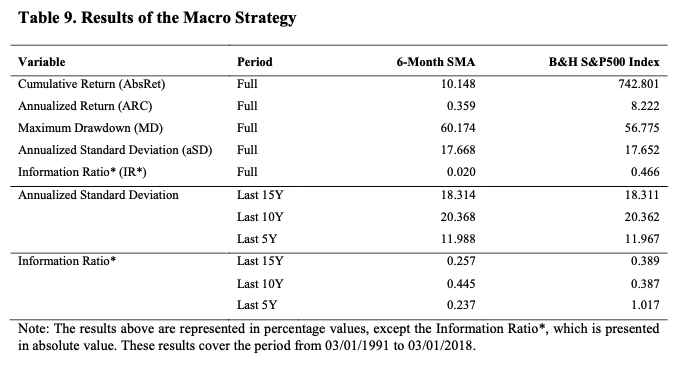

In [7]:
from IPython.display import Image
Image(filename='/Users/Sergio/Documents/Master_QF/Thesis/Papers/Performance metrics/K-Table.png')

In [8]:
metrics = ['AbsRet', 'ARC', 'IR', 'aSD', 'MD']

paper_data = [[742.801, 8.222, 0.466, 17.652, 56.775]]
df_metrics = pd.DataFrame(data=paper_data, index=['Paper metrics'], columns=metrics)

metrics_row = calculate_performance_metrics(df_1, strat_name='Buy and Hold')
df_metrics = pd.concat([df_metrics, metrics_row], axis=0).drop_duplicates().round(3)

df_metrics

,AbsRet,ARC,IR,aSD,MD,AMD,MLD,All Risk,ARCMD,ARCAMD,Num Trades,No signal
Paper metrics,742.801,8.222,0.466,17.652,56.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buy and Hold,731.080,8.158,0.462,17.644,56.775,13.019,7.173,9.355,0.144,0.627,1.0,0.0


# Paper:  "Predicting prices of S&P500 index using classical methods and recurrent neural networks"

Data from 2000-01-01 to 2020-05-02  
Uses log returns to calculate the metrics

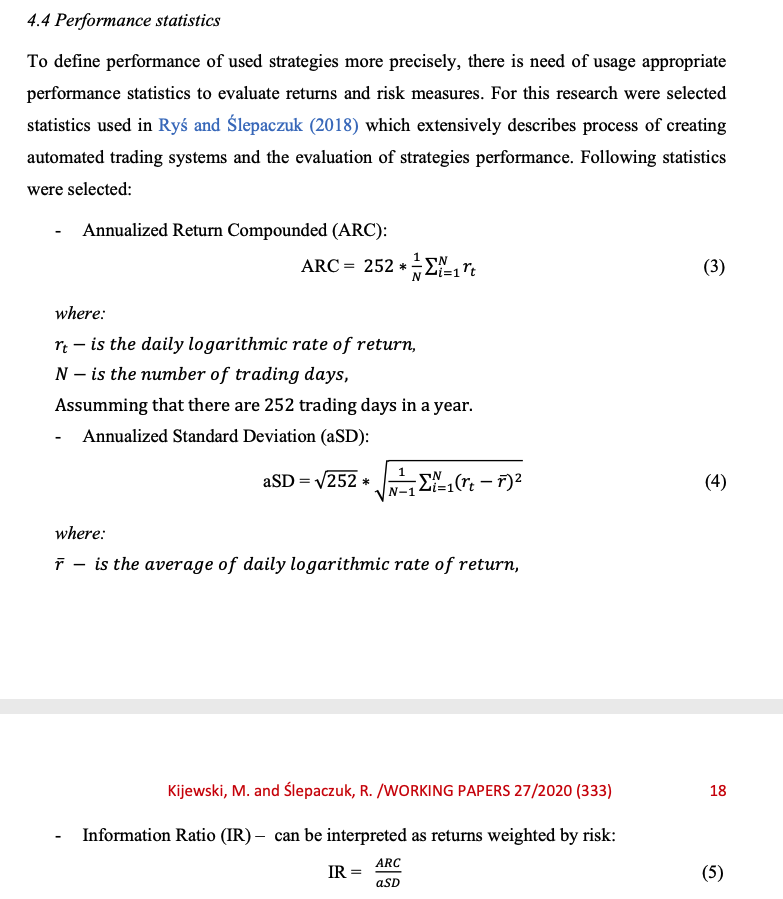

In [9]:
from IPython.display import Image
Image(filename='/Users/Sergio/Documents/Master_QF/Thesis/Papers/Performance metrics/M-Formulas.png')
# Data from 2000 : 2020-05-02

We do the backtest of buy_and_hold strategy and compare metrics with the ones from the paper:

In [10]:
df_2 = df.loc['2000-01-01':'2020-05-02', ['Close', 'Market_daily_ret']].copy()

df_2 = backtest_strat(df_2, buy_and_hold(df_2), commision=0)[0]

df_2.head(4)
#df_2.tail(2)
#df_2['Close'].plot(title='SP500', legend=True)

,Close,Market_daily_ret,Strat_daily_ret,Strat_position_EOD,Costs,Long_only,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2000-01-03,1455.219971,-0.009549,-0.009549,1.0,0.0,1.0,99.045089,99.045089
2000-01-04,1399.420044,-0.038345,-0.038345,1.0,0.0,1.0,95.247238,95.247238
2000-01-05,1402.109985,0.001922,0.001922,1.0,0.0,1.0,95.430321,95.430321
2000-01-06,1403.449951,0.000956,0.000956,1.0,0.0,1.0,95.521521,95.521521


Metrics from paper:

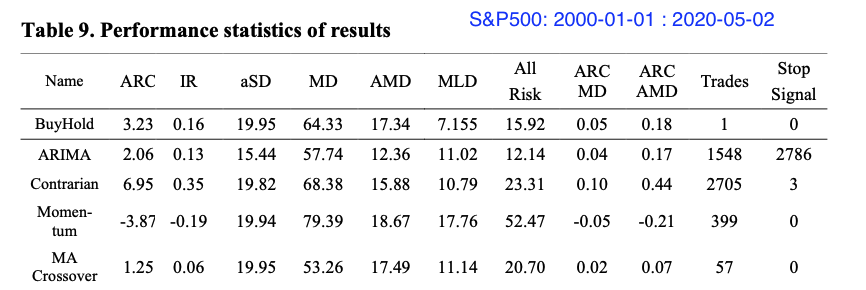

In [11]:
from IPython.display import Image
Image(filename='/Users/Sergio/Documents/Master_QF/Thesis/Papers/Performance metrics/M-Table.png')
# Data from 2000 : 2020-05-02

In [12]:
metrics = ['ARC', 'IR', 'aSD', 'MD', 'AMD', 'MLD', 'All Risk', 'ARCMD', 'ARCAMD', 'Num Trades', 'No signal']
paper_data = [[3.23, 0.16, 19.95, 64.33, 17.34, 7.155, 15.92, 0.05, 0.18, 1, 0]]
df_metrics = pd.DataFrame(data=paper_data, index=['Paper metrics'], columns=metrics)

metrics_row = calculate_performance_metrics(df_2, strat_name='Buy and Hold')
df_metrics = pd.concat([df_metrics, metrics_row], axis=0).drop_duplicates().round(3)

df_metrics

,ARC,IR,aSD,MD,AMD,MLD,All Risk,ARCMD,ARCAMD,Num Trades,No signal,AbsRet
Paper metrics,3.230,0.160,19.950,64.330,17.34,7.155,15.920,0.050,0.180,1,0,NaN
Buy and Hold,3.284,0.165,19.918,56.775,16.52,7.173,13.401,0.058,0.199,1,0,92.664


## Demonstration of MD, MLD and AMD using quanstats library

Using data from paper 1 (1991-01-03 to 2018-01-03)  
Following code is to check drawdowns.  
- Paper 2 gave a MD of 64.33%, which seems to be wrong

In [13]:
dd = qs.stats.drawdown_details(qs.stats.to_drawdown_series(df_1['Market_cum_ret'])).sort_values(by='max drawdown', ascending=True)
dd.head()

,start,valley,end,days,max drawdown,99% max drawdown
153,2007-10-10,2009-03-09,2013-03-28,1996,-56.775388,-51.662781
148,2000-03-27,2002-10-09,2007-05-30,2620,-49.146948,-45.798254
122,1998-07-20,1998-08-31,1998-11-23,126,-19.335999,-19.153992
207,2015-05-22,2016-02-11,2016-07-11,416,-14.160750,-13.017529
142,1999-07-19,1999-10-15,1999-11-16,120,-12.078687,-11.605042


Maximum Loss Duration (in years):

In [14]:
dd = qs.stats.drawdown_details(qs.stats.to_drawdown_series(df_1['Market_cum_ret'])).sort_values(by='days', ascending=False)
dd.insert(4, 'years', dd['days']/365.25)
dd.head(5)

,start,valley,end,days,years,max drawdown,99% max drawdown
148,2000-03-27,2002-10-09,2007-05-30,2620,7.173169,-49.146948,-45.798254
153,2007-10-10,2009-03-09,2013-03-28,1996,5.464750,-56.775388,-51.662781
207,2015-05-22,2016-02-11,2016-07-11,416,1.138946,-14.160750,-13.017529
35,1994-02-03,1994-04-04,1995-02-14,376,1.029432,-8.937757,-8.232364
18,1992-01-16,1992-04-08,1992-07-29,195,0.533881,-6.243313,-4.817356


For MLD in years, I believe I should divide the number of days of MLD by 365.25, but result is more similar to the one from paper if I divide the number of days by 366. Kamil, how was it calculated on the paper?

In [15]:
from datetime import datetime
max_loss_dur = datetime(2007, 5, 30) - datetime(2000, 3, 27)
print(max_loss_dur.days)
print("{:.4f}".format(max_loss_dur.days / 365))
print("{:.4f}".format(max_loss_dur.days / 365.25))
print("{:.4f}".format(max_loss_dur.days / 366))

2620
7.1781
7.1732
7.1585


To calculate AMD, I group returns by year and do the mean of the MD of each year:

In [16]:
print("AMD = {:.3f} %".format(abs(df_2['Market_daily_ret'].groupby(by=df_2.index.year).apply(qs.stats.max_drawdown).mean()*100)))
df_2['Market_daily_ret'].groupby(by=df_2.index.year).apply(qs.stats.max_drawdown).mul(100).to_frame(name='MD (%)').abs().round(3).T

AMD = 16.520 %


Date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
MD (%),17.2,29.695,33.752,14.053,8.165,7.166,7.699,10.09,48.006,27.621,15.995,19.388,9.936,5.756,7.401,12.353,9.304,2.797,19.778,6.836,33.925
